In [79]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
from utils import *

In [162]:
# Set up model parameters 
epsilon = 1
eta = -0.5 # asymmetry parameter
sigma = 0 # disorder
mean_omega = 0.02

# Set up simulation parameters 
L = 128
T = 2e3
n_frames = T

# Initialise the model and run the simulation 
model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=[0, -0.01])
model.initialise(L, T, n_frames, seed=1000)
model.evolve() 

100%|██████████| 2000/2000 [00:00<00:00, 7475.91it/s]


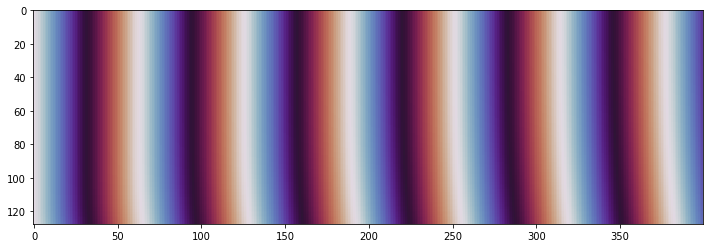

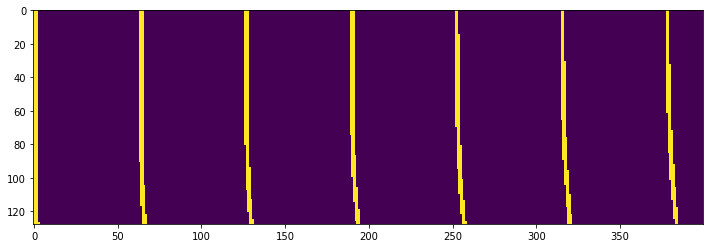

In [163]:
phases = model.res

fig = plt.figure(figsize=(12, 10))
plt.imshow(phases[::5].T, interpolation='None', cmap='twilight')
plt.show() 

fig = plt.figure(figsize=(12, 10))
plt.imshow(phases[::5].T < np.pi/12, interpolation='None')
plt.show() 

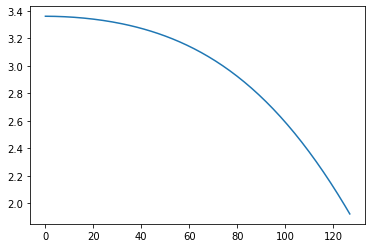

In [125]:
f = phases[-1]
shift(f)
plt.plot(f)
plt.show() 